<h1> Pretraitement partie 02

In [181]:
import sys 
sys.path.insert(1, "../Utilss")

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="white")

In [183]:
from utils import load_data
data = load_data('../Data/Dataset1.csv')

In [184]:
from utils import describe_column
colonnes_description = describe_column(data)
pd.DataFrame(colonnes_description, columns = ["Name","Non-null value","Type"])

,Name,Non-null value,Type
0,N,885,int64
1,P,885,object
2,K,885,int64
3,pH,885,float64
4,EC,885,float64
5,OC,884,float64
6,S,885,float64
7,Zn,885,float64
8,Fe,885,float64
9,Cu,884,float64


In [185]:
# Print unique values in each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column '{column}': {unique_values}")

Column 'N': [138 213 163 157 270 220 207 333 289 151 144 201 182 238 245 282 307 364
 276 169 295  82 107  38  88  19  56  50  25 264 301 226 326 251 195  31
  69 132   6 351  13 314  75 232 188 126 119 257 320 345 100  63 358 113
 176 200 370 377 339  94 383]
Column 'P': ['8.6' '7.5' '9.6' '6.8' '9.9' '7.2' '7' '14.9' '8.1' '5.3' '8.3' '7.7'
 '?' '6.1' '9.4' '5.5' '5' '5.7' '7.9' '10.7' '5.9' '4.8' '6.4' '6.6'
 '4.4' '4.6' '9' '59.2' '14.5' '9.2' '78.9' '12.3' '11.2' '12.9' '11.4'
 '14.3' '10.5' '10.3' '12.7' '11.8' '14.7' '13.4' '3.9' '11' '11.6' '18.4'
 '20.4' '19.3' '18.2' '19.5' '20.8' '21.5' '21.1' '10.1' '8.8' '2.9'
 '15.6' '12.5' '13.8' '76.8' '103.1' '63.6' '61.4' '70.2' '68' '65.8'
 '74.6' '81.1' '98.7' '85.5' '72.4' '13.2' '12.1' '111.8' '125' '15.1'
 '118.4' '14' '13.6' '15.4' '16' '17.3' '94.3' '92.1' '89.9' '96.5'
 '122.8' '114' '107.5' '83.3' '87.7' '105.3' '120.6']
Column 'K': [ 560  338  718  475  444  222  401  422  739  549  306  676  771  655
  803  454  127   11  4

Ici on remarque le "?" qu'on doit traiter

In [186]:
# remplace the ? by NaN to detect them  as missing values
data.replace('?', np.nan, inplace=True)

# Convert the column to numeric values
data['P'] = pd.to_numeric(data['P'], errors='coerce')

<h3>Les mesures de tendance centrale

In [187]:
 
from utils import central_trend,symetrie, quartile, missing_value
attributes = data.columns
central_trend_dict = {}

for attribute in attributes:
    ct_result = central_trend(data, attribute)
    
    
    # Create a dictionary for the current attribute's central trend
    tc = {
        'Median': ct_result['median'],
        'Mean': ct_result['mean'],
        'Modes': ct_result['modes'],
        
    }
    
    # Add additional measures 
    #quartile_result = quartile(data[attribute])
    #tc['First Quartile'] = quartile_result[1]
    #tc['Third Quartile'] = quartile_result[3]
    
    tc['symetrie'] = symetrie(tc)
    
    #missing, result = missing_value(data[attribute])
    # tc['Missing Values'] = missing

    central_trend_dict[attribute] = tc

# Create a DataFrame from the dictionary
pd.DataFrame.from_dict(central_trend_dict, orient='index')



,Median,Mean,Modes,symetrie
N,257.0000,246.997740,[207],Distribution non identifie
P,8.1000,14.555266,[8.3],Distribution non identifie
K,475.0000,501.338983,[444],Distribution d'asymetrie positive
pH,7.5000,7.511955,[7.5],Distribution symetrique
EC,0.5500,0.543921,"[0.53, 0.62]",Distribution symetrique
OC,0.5900,0.617817,[0.88],Distribution symetrique
S,6.6400,7.545808,"[4.22, 5.13]",Distribution d'asymetrie positive
Zn,0.3600,0.468723,[0.28],Distribution symetrique
Fe,3.5600,4.126757,[6.32],Distribution non identifie
Cu,0.9300,0.952002,[1.25],Distribution symetrique


<h3>Construction des boîtes à moustache 

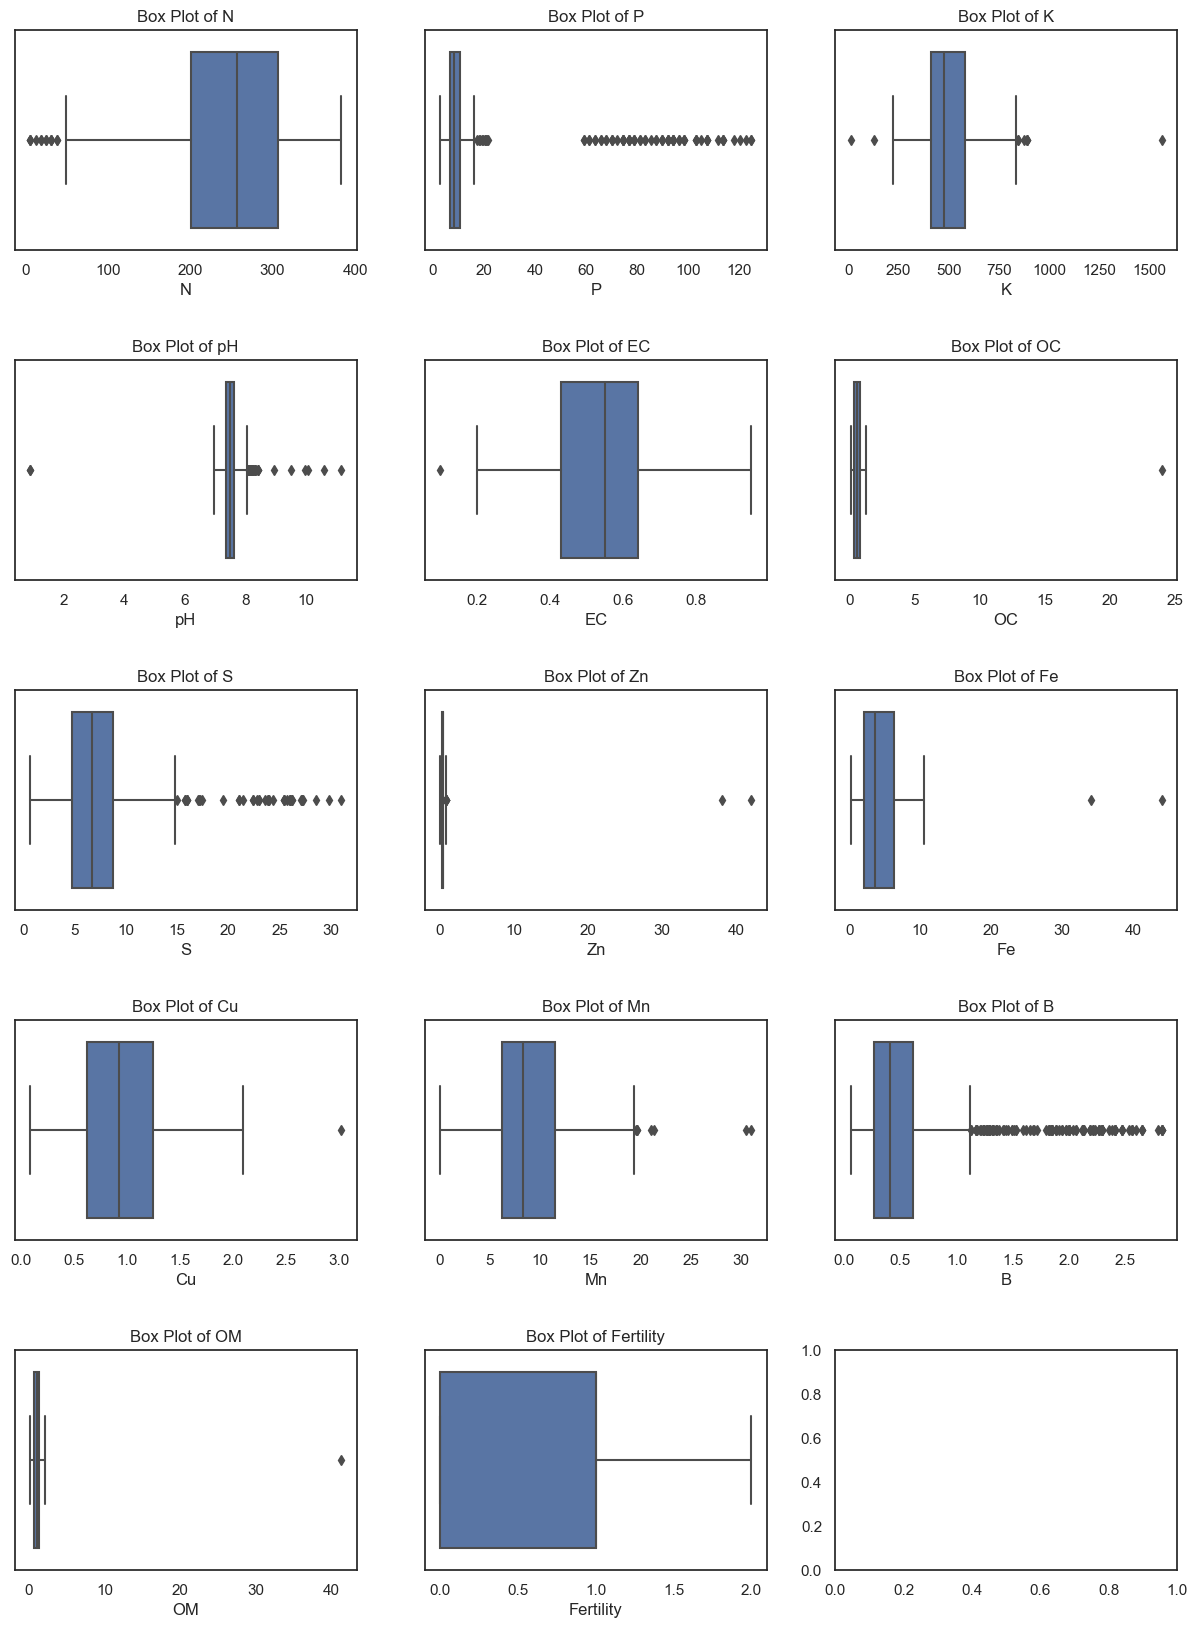

In [188]:
from utils import box_plot_sns
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt


fig, axes = plt.subplots(5, 3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

for i, attribute in enumerate(attributes):
    row, col = divmod(i, 3)
    box_plot_sns(data, attribute, axes[row, col])

plt.show()

<h3>Diagramme de desperssion de donnees

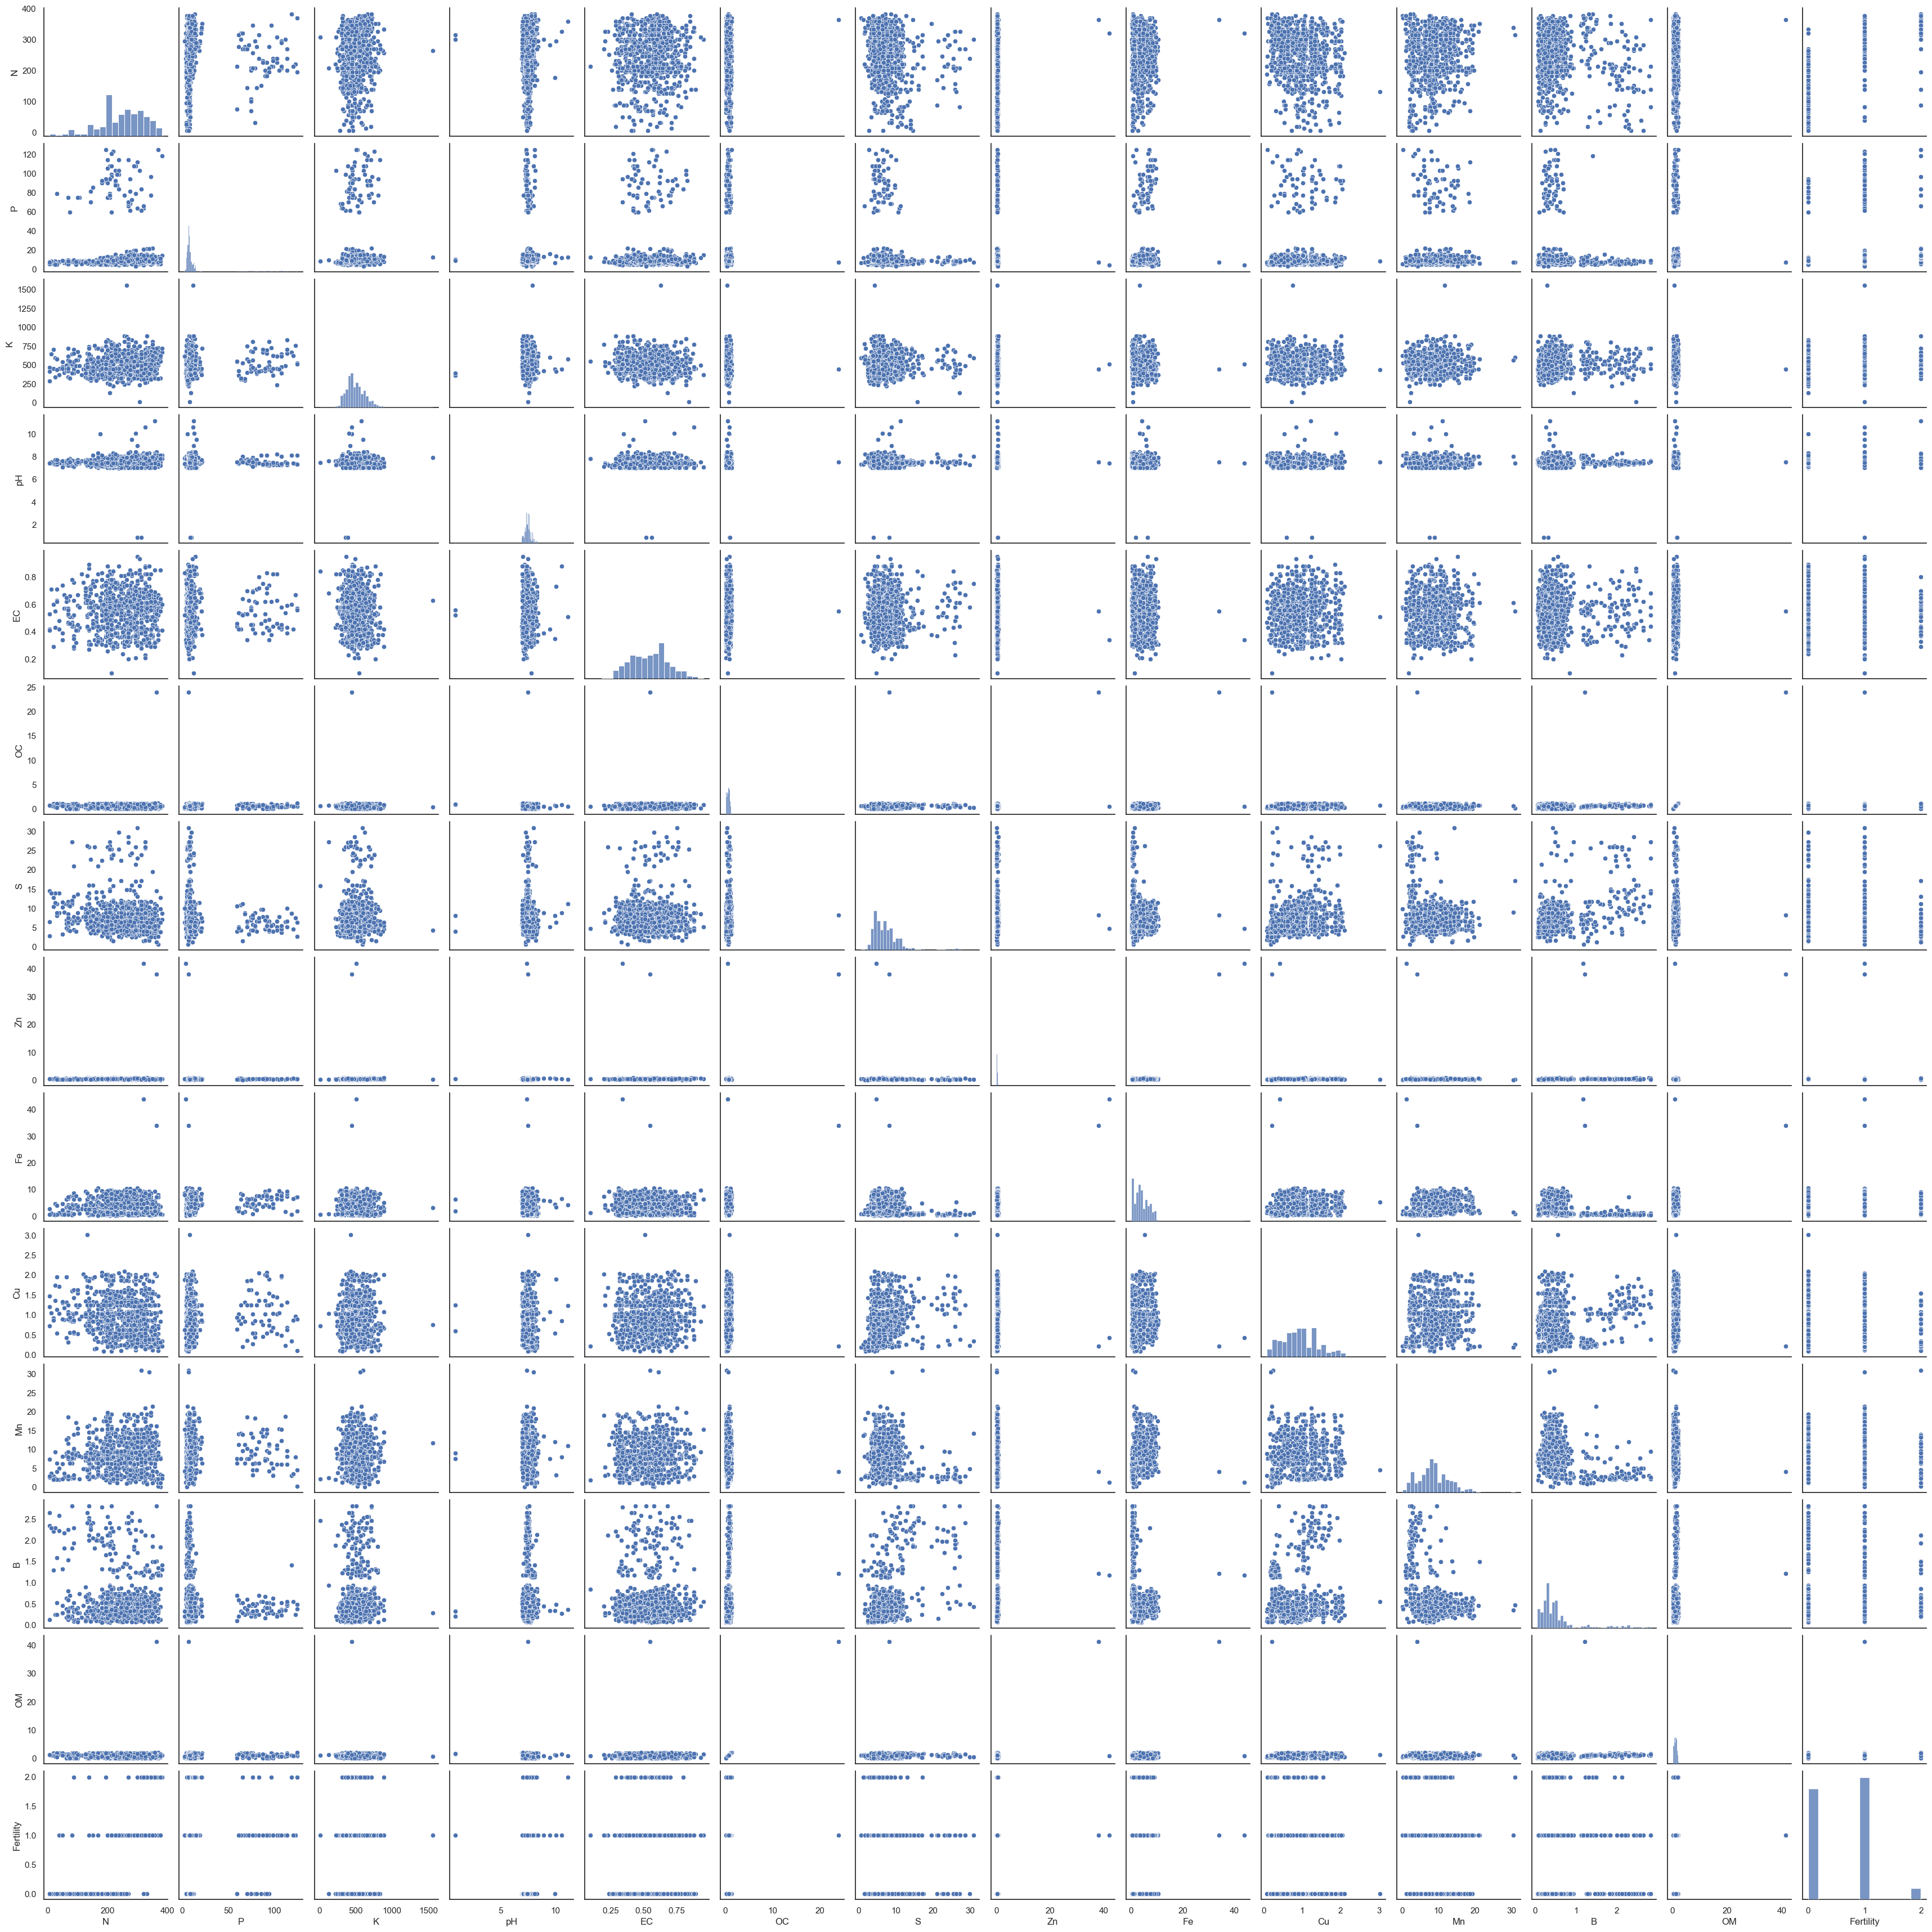

In [189]:
import seaborn as sns
sns.pairplot(data)
plt.show()

<h2>Traitement des valeurs manquantes

In [190]:
def missing_values_info(data):
    missing_values_count = data.isnull().sum()
    missing_percentage = (missing_values_count / len(data)) * 100
    
    missing_info_df = pd.DataFrame({
        'Column': missing_values_count.index,
        'Missing_Values_Count': missing_values_count.values,
        'Missing_Values_Percentage': missing_percentage.values
    })

    return missing_info_df
missing_values_info(data)

,Column,Missing_Values_Count,Missing_Values_Percentage
0,N,0,0.000000
1,P,2,0.225989
2,K,0,0.000000
3,pH,0,0.000000
4,EC,0,0.000000
5,OC,1,0.112994
6,S,0,0.000000
7,Zn,0,0.000000
8,Fe,0,0.000000
9,Cu,1,0.112994


In [191]:
# null values number
data[data.columns[data.isnull().any()]].isnull().sum()

P     2
OC    1
Cu    1
dtype: int64

In [192]:
from utils import central_trend
data = data.copy()
ct_result_OM = central_trend(data, "OC")
ct_result_CU = central_trend(data, "Cu")
ct_result_P = central_trend(data, "P")
# Mode imputation
# The two attributes have a symetric distribution so we can aply this methode
modes = ct_result_OM["modes"]
for mode_value in modes:
    data['OC'].replace(np.nan, mode_value, inplace=True)
mode_values = ct_result_P["modes"]
for mode_value in mode_values:
    data['P'].replace(np.nan, mode_value, inplace=True)
# Median imputation
data['Cu'].replace(np.nan, ct_result_CU["median"], inplace=True)


In [193]:
# Vérifier les valeurs manquantes après l'imputation
data[data.columns[data.isnull().any()]].isnull().sum()

Series([], dtype: float64)

<h2>Treaitement des valeurs aberrantes

In [194]:
attributes = data.columns
for attribute in attributes:
    print(f"Attribute: {attribute}")
    print(data[attribute][data[attribute].apply(lambda x: isinstance(x, str))])
    print("\n")


Attribute: N
Series([], Name: N, dtype: int64)


Attribute: P
Series([], Name: P, dtype: float64)


Attribute: K
Series([], Name: K, dtype: int64)


Attribute: pH
Series([], Name: pH, dtype: float64)


Attribute: EC
Series([], Name: EC, dtype: float64)


Attribute: OC
Series([], Name: OC, dtype: float64)


Attribute: S
Series([], Name: S, dtype: float64)


Attribute: Zn
Series([], Name: Zn, dtype: float64)


Attribute: Fe
Series([], Name: Fe, dtype: float64)


Attribute: Cu
Series([], Name: Cu, dtype: float64)


Attribute: Mn
Series([], Name: Mn, dtype: float64)


Attribute: B
Series([], Name: B, dtype: float64)


Attribute: OM
Series([], Name: OM, dtype: float64)


Attribute: Fertility
Series([], Name: Fertility, dtype: int64)




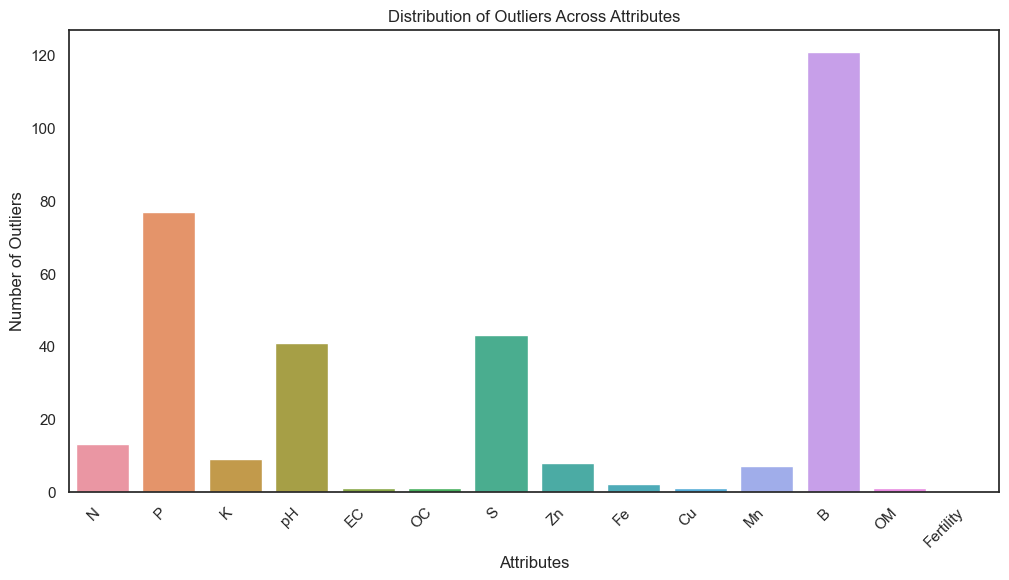

,Attribute,Outliers number
N,N,13
P,P,77
K,K,9
pH,pH,41
EC,EC,1
OC,OC,1
S,S,43
Zn,Zn,8
Fe,Fe,2
Cu,Cu,1


In [195]:
import seaborn as sns
from utils import find_outliers_iqr

# Find the outliers
attributes = data.columns
outliers_dict = {}

for attribute in data.columns:
    outliers_result = find_outliers_iqr(data[attribute])
    valid_indices = [idx for idx in outliers_result if 0 <= idx < len(data[attribute])]
    outliers_values = data[attribute].iloc[valid_indices].tolist()

    OD = {
        'Attribute': attribute,
        'Outliers number': len(valid_indices)
    }

    outliers_dict[attribute] = OD

# Create a DataFrame from the dictionary
result_df = pd.DataFrame.from_dict(outliers_dict, orient='index')

# Set Seaborn color palette to pastel blue
sns.set_palette("pastel")

# Plot using Seaborn with pastel blue color
plt.figure(figsize=(12, 6))
sns.barplot(x=result_df['Attribute'], y=result_df['Outliers number'])
plt.xlabel('Attributes')
plt.ylabel('Number of Outliers')
plt.title('Distribution of Outliers Across Attributes')
plt.xticks(rotation=45, ha='right')
plt.show()

# Create a DataFrame from the dictionary
pd.DataFrame.from_dict(outliers_dict, orient='index')


In [196]:
from utils import find_outliers_iqr
attributes = data.columns
outliers_dict = {}

for attribute in attributes:
    outliers_result = find_outliers_iqr(data[attribute])
    # fix the index problem
    valid_indices = [idx for idx in outliers_result if 0 <= idx < len(data[attribute])]
    OD = {
        'Outliers indices': valid_indices,
        'Outliers values': data[attribute].iloc[valid_indices].tolist(),
        'Outliers number': len(valid_indices)
    }

    outliers_dict[attribute] = OD

# Create a DataFrame from the dictionary
pd.DataFrame.from_dict(outliers_dict, orient='index')

,Outliers indices,Outliers values,Outliers number
N,"[52, 54, 57, 58, 72, 75, 81, 88, 91, 149, 244,...","[38, 19, 38, 25, 31, 19, 6, 13, 6, 31, 6, 25, 31]",13
P,"[243, 279, 491, 492, 493, 494, 495, 496, 497, ...","[59.2, 78.9, 18.4, 20.4, 19.3, 18.2, 19.5, 20....",77
K,"[23, 24, 291, 335, 743, 750, 801, 858, 865]","[127, 11, 887, 876, 845, 887, 1560, 845, 887]",9
pH,"[8, 34, 328, 339, 356, 520, 522, 526, 529, 530...","[8.26, 8.23, 8.1, 8.3, 9.97, 0.9, 0.9, 8.3, 8....",41
EC,[713],[0.1],1
OC,[668],[24.0],1
S,"[1, 3, 22, 23, 24, 25, 26, 28, 30, 32, 33, 34,...","[25.4, 26.0, 23.6, 27.2, 15.8, 26.2, 26.0, 15....",43
Zn,"[16, 36, 41, 66, 255, 540, 660, 668]","[0.77, 0.83, 0.76, 0.78, 0.79, 0.85, 42.0, 38.0]",8
Fe,"[660, 668]","[44.0, 34.0]",2
Cu,[151],[3.02],1


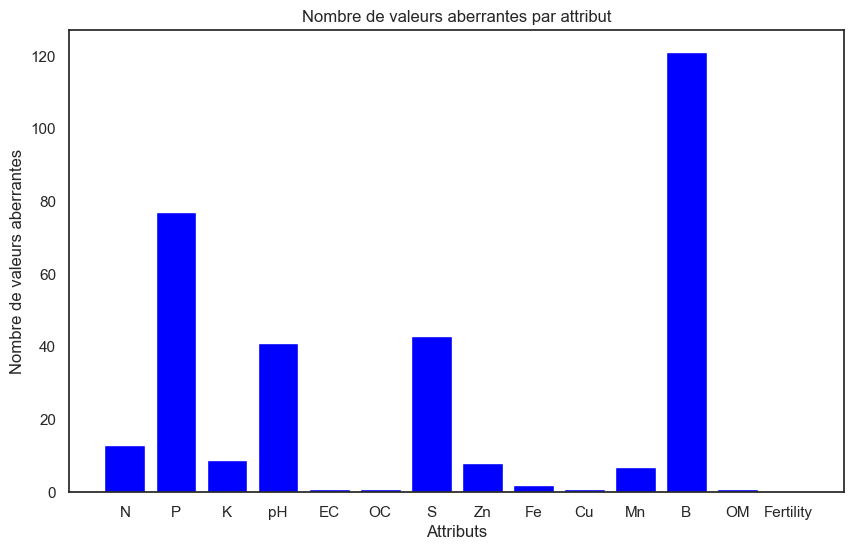

In [197]:
# Les données des valeurs aberrantes (à remplacer par vos propres données)
categories = ['N', 'P', 'K', 'pH', 'EC', 'OC', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B', 'OM', 'Fertility']
outliers_number = [13, 77, 9, 41, 1, 1, 43, 8, 2, 1, 7, 121, 1, 0]

# Créer un diagramme à barres
plt.figure(figsize=(10, 6))
plt.bar(categories, outliers_number, color='blue')
plt.xlabel('Attributs')
plt.ylabel('Nombre de valeurs aberrantes')
plt.title('Nombre de valeurs aberrantes par attribut')
plt.show()

In [198]:
from utils import winsorize
for attribute in attributes:
    data[attribute] = winsorize(data[attribute])

In [199]:
outliers_dict = {}

for attribute in attributes:
    outliers_result = find_outliers_iqr(data[attribute])
    # fix the index problem
    valid_indices = [idx for idx in outliers_result if 0 <= idx < len(data[attribute])]
    OD = {
        'Outliers indices': valid_indices,
        'Outliers values': data[attribute].iloc[valid_indices].tolist(),
        'Outliers number': len(valid_indices)
    }

    outliers_dict[attribute] = OD

# Create a DataFrame from the dictionary
pd.DataFrame.from_dict(outliers_dict, orient='index')

,Outliers indices,Outliers values,Outliers number
N,[],[],0
P,[],[],0
K,[],[],0
pH,[],[],0
EC,[],[],0
OC,[],[],0
S,[],[],0
Zn,[],[],0
Fe,[],[],0
Cu,[],[],0


<h2>Réduction des données

<h3>Analyse de variance

Les attributs avec une faible variance, c'est-à-dire des attributs dont les valeurs sont presque constantes, peuvent être moins informatifs. 

In [200]:
variance = data.var()
variance

N             5857.072339
P               10.887582
K            15183.025282
pH               0.065826
EC               0.019958
OC               0.088314
S                9.542743
Zn               0.015374
Fe               7.015928
Cu               0.213338
Mn              17.537598
B                0.094982
OM               0.262107
Fertility        0.334553
dtype: float64

<h3>Analyse de la corrélation

 Si deux attributs sont fortement corrélés, l'un d'entre eux peut être redondant et peut être supprimé. 

In [201]:
correlation_matrix = data.corr()
correlation_matrix

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
N,1.000000,0.212703,0.052705,0.136404,-0.006026,-0.043764,-0.155959,-0.045187,0.056699,-0.183731,0.094900,-0.065051,-0.042460,0.712457
P,0.212703,1.000000,0.086056,0.031661,0.011482,0.023131,-0.123665,0.030227,0.145338,0.006761,0.108984,-0.093681,0.025047,0.443035
K,0.052705,0.086056,1.000000,-0.045361,-0.102667,-0.045818,0.026238,0.086795,-0.064455,-0.007993,0.014443,0.158864,-0.046446,0.062611
pH,0.136404,0.031661,-0.045361,1.000000,0.093032,-0.016907,-0.009683,-0.063156,-0.076293,-0.019390,-0.032027,0.011189,-0.014546,0.134165
EC,-0.006026,0.011482,-0.102667,0.093032,1.000000,-0.024536,0.032805,-0.017413,-0.032044,0.034451,-0.049689,-0.009273,-0.024996,-0.024759
OC,-0.043764,0.023131,-0.045818,-0.016907,-0.024536,1.000000,0.147161,0.102505,-0.057548,0.110599,-0.131937,0.187296,0.999464,0.039499
S,-0.155959,-0.123665,0.026238,-0.009683,0.032805,0.147161,1.000000,0.012244,-0.188913,0.170069,-0.204757,0.397743,0.147388,-0.076322
Zn,-0.045187,0.030227,0.086795,-0.063156,-0.017413,0.102505,0.012244,1.000000,0.223749,0.192803,0.033252,0.162012,0.103499,-0.021684
Fe,0.056699,0.145338,-0.064455,-0.076293,-0.032044,-0.057548,-0.188913,0.223749,1.000000,0.192964,0.376559,-0.363999,-0.057767,0.023763
Cu,-0.183731,0.006761,-0.007993,-0.019390,0.034451,0.110599,0.170069,0.192803,0.192964,1.000000,0.097334,0.033469,0.110729,-0.137017


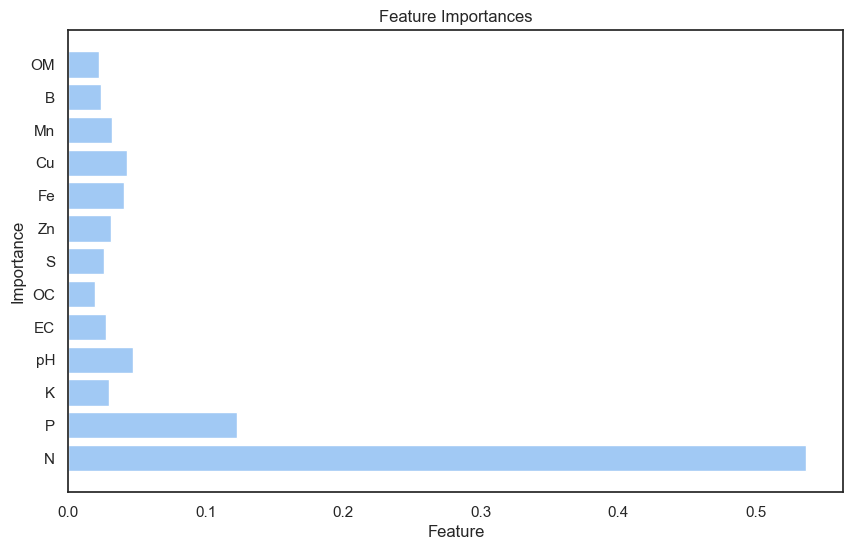

In [202]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop('Fertility', axis=1)
y = data['Fertility']

model = RandomForestClassifier()
model.fit(X, y)

feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')
plt.show()


<h2>Normalisation des données

In [203]:
from utils import z_score_normalize
df_norm_z_score = z_score_normalize(data.iloc[:, :-1])
df_norm_z_score

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM
0,-1.428030,-0.137269,0.483099,-0.181714,0.538410,0.361557,-0.405275,-1.127087,-1.418543,-0.391933,0.020803,-1.227277,0.359877
1,-0.448041,-0.470639,-1.318566,0.441910,1.458623,1.572959,2.483885,-0.643191,-1.210898,1.275147,-1.368951,2.049899,1.569338
2,-1.101367,0.165795,1.765364,0.324980,-0.240231,1.741209,2.313934,-0.643191,-1.210898,1.340098,-1.414321,2.049899,1.737319
3,-1.179766,-0.682784,-0.206728,0.519863,0.255268,1.169158,2.483885,-0.320593,-1.331710,1.253496,-1.426260,2.049899,1.166185
4,0.296750,0.256714,-0.458312,0.480886,-1.018872,0.899958,1.504646,-1.046438,-1.248652,1.599903,-1.478794,2.049899,0.897416
...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,0.375149,0.044569,-1.058866,0.441910,0.538410,-0.345094,-0.165726,0.324603,-0.187778,-0.695039,-0.511697,-0.545884,-0.345642
881,0.950076,1.438663,-0.888439,-0.493526,0.750767,1.606609,-0.557422,1.614993,0.193533,0.149327,1.104907,0.135509,1.602934
882,0.218351,0.377940,-0.206728,-0.064785,1.387837,0.967258,1.103239,0.566551,1.243080,1.989610,0.479279,0.459982,0.964608
883,-0.356576,-0.137269,-0.458312,-0.298644,0.750767,0.428857,1.472274,-0.078645,-1.286405,-0.110478,-1.536104,2.049899,0.427070


In [204]:
from utils import min_max_normalize
df_norm_min_max = min_max_normalize(data.iloc[:, :-1])
df_norm_min_max

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM
0,0.281525,0.417582,0.593935,0.473214,0.604790,0.468750,0.370814,0.248175,0.007990,0.325359,0.446753,0.047170,0.468750
1,0.501466,0.336996,0.265533,0.616071,0.760479,0.750000,1.000000,0.335766,0.051938,0.693780,0.144416,1.000000,0.750000
2,0.354839,0.490842,0.827663,0.589286,0.473054,0.789062,0.962989,0.335766,0.051938,0.708134,0.134545,1.000000,0.789063
3,0.337243,0.285714,0.468195,0.633929,0.556886,0.656250,1.000000,0.394161,0.026368,0.688995,0.131948,1.000000,0.656250
4,0.668622,0.512821,0.422337,0.625000,0.341317,0.593750,0.786747,0.262774,0.043947,0.765550,0.120519,1.000000,0.593750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,0.686217,0.461538,0.312870,0.616071,0.604790,0.304688,0.422982,0.510949,0.268478,0.258373,0.330909,0.245283,0.304688
881,0.815249,0.798535,0.343935,0.401786,0.640719,0.757812,0.337681,0.744526,0.349181,0.444976,0.682597,0.443396,0.757813
882,0.651026,0.542125,0.468195,0.500000,0.748503,0.609375,0.699330,0.554745,0.571314,0.851675,0.546494,0.537736,0.609375
883,0.521994,0.417582,0.422337,0.446429,0.640719,0.484375,0.779697,0.437956,0.035957,0.387560,0.108052,1.000000,0.484375


In [205]:
# ad the target column
df_norm_min_max['Fertility'] = data['Fertility']
data = df_norm_min_max 

In [206]:
from utils import describe_column
colonnes_description = describe_column(data)
pd.DataFrame(colonnes_description, columns = ["Name","Non-null value","Type"])

,Name,Non-null value,Type
0,N,885,float64
1,P,885,float64
2,K,885,float64
3,pH,885,float64
4,EC,885,float64
5,OC,885,float64
6,S,885,float64
7,Zn,885,float64
8,Fe,885,float64
9,Cu,885,float64


In [207]:
variance = data.var()
variance

N            0.050370
P            0.058434
K            0.033225
pH           0.052476
EC           0.028624
OC           0.053902
S            0.047426
Zn           0.032765
Fe           0.044794
Cu           0.048840
Mn           0.047327
B            0.084534
OM           0.054076
Fertility    0.334553
dtype: float64

In [208]:
correlation_matrix = data.corr()
correlation_matrix

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
N,1.000000,0.212703,0.052705,0.136404,-0.006026,-0.043764,-0.155959,-0.045187,0.056699,-0.183731,0.094900,-0.065051,-0.042460,0.712457
P,0.212703,1.000000,0.086056,0.031661,0.011482,0.023131,-0.123665,0.030227,0.145338,0.006761,0.108984,-0.093681,0.025047,0.443035
K,0.052705,0.086056,1.000000,-0.045361,-0.102667,-0.045818,0.026238,0.086795,-0.064455,-0.007993,0.014443,0.158864,-0.046446,0.062611
pH,0.136404,0.031661,-0.045361,1.000000,0.093032,-0.016907,-0.009683,-0.063156,-0.076293,-0.019390,-0.032027,0.011189,-0.014546,0.134165
EC,-0.006026,0.011482,-0.102667,0.093032,1.000000,-0.024536,0.032805,-0.017413,-0.032044,0.034451,-0.049689,-0.009273,-0.024996,-0.024759
OC,-0.043764,0.023131,-0.045818,-0.016907,-0.024536,1.000000,0.147161,0.102505,-0.057548,0.110599,-0.131937,0.187296,0.999464,0.039499
S,-0.155959,-0.123665,0.026238,-0.009683,0.032805,0.147161,1.000000,0.012244,-0.188913,0.170069,-0.204757,0.397743,0.147388,-0.076322
Zn,-0.045187,0.030227,0.086795,-0.063156,-0.017413,0.102505,0.012244,1.000000,0.223749,0.192803,0.033252,0.162012,0.103499,-0.021684
Fe,0.056699,0.145338,-0.064455,-0.076293,-0.032044,-0.057548,-0.188913,0.223749,1.000000,0.192964,0.376559,-0.363999,-0.057767,0.023763
Cu,-0.183731,0.006761,-0.007993,-0.019390,0.034451,0.110599,0.170069,0.192803,0.192964,1.000000,0.097334,0.033469,0.110729,-0.137017


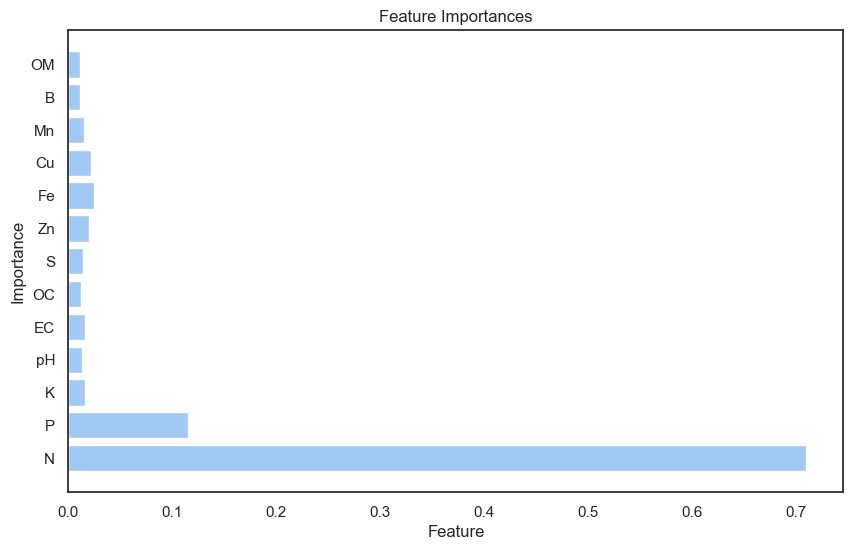

In [209]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assuming you have a DataFrame 'data' with features and target 'Fertility'
X = data.drop('Fertility', axis=1)
y = data['Fertility']

model = RandomForestRegressor()  # Use RandomForestRegressor for regression
model.fit(X, y)

feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')
plt.show()

<h2>Réduction des données

In [210]:
# drop the column with the lowest variance
data.drop('EC', axis=1, inplace=True)
data.drop('OC', axis=1, inplace=True)
# we can also drop K and S that have lowest importance
# data.drop('K', axis=1, inplace=True)
# data.drop('S', axis=1, inplace=True)
# we can drop the column with the lowest variance as Zn and OM
# data.drop('Zn', axis=1, inplace=True)
# data.drop('OM', axis=1, inplace=True)

In [211]:
colonnes_description = describe_column(data)
pd.DataFrame(colonnes_description, columns = ["Name","Non-null value","Type"])

,Name,Non-null value,Type
0,N,885,float64
1,P,885,float64
2,K,885,float64
3,pH,885,float64
4,S,885,float64
5,Zn,885,float64
6,Fe,885,float64
7,Cu,885,float64
8,Mn,885,float64
9,B,885,float64


In [212]:
# Drop duplicate rows in-place
data.drop_duplicates(inplace=True)

In [213]:
colonnes_description = describe_column(data)
pd.DataFrame(colonnes_description, columns = ["Name","Non-null value","Type"])

,Name,Non-null value,Type
0,N,881,float64
1,P,881,float64
2,K,881,float64
3,pH,881,float64
4,S,881,float64
5,Zn,881,float64
6,Fe,881,float64
7,Cu,881,float64
8,Mn,881,float64
9,B,881,float64


In [214]:
data.to_csv('../Data/Dataset1_cleaned.csv', index=False)

<h1>Done